In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
import time
import pandas as pd
from src.PLS.utils import meta_mle
from decimal import Decimal, ROUND_UP
from src.PLS.metaSIR import basic_kernel
from src.PLS.metaSIR import basic_square_map
from src.PLS.metaSIR import straight_line_distances
from src.PLS.metaSIR import meta_timed_sir
from src.PLS.utils import meta_mle_sir

In [3]:
seed = 1
N = 4
R0 =5
test_map = basic_square_map(N)
test_distances = straight_line_distances(test_map, N, scaling=10)
gamma = 1
X0 = [[999, 1, 0]]
div = sum(X0[0])
for i in range(N - 1):
    X0.append([1000, 0, 0])
beta = R0 / div
rng = np.random.default_rng(seed)
tstep = 0.01
tmax = 100
tmax = float(Decimal(tstep) * (Decimal(meta_timed_sir(X0, beta, gamma, N, test_distances,basic_kernel, tmax, tstep, rng)) / Decimal(tstep)).quantize(1, rounding=ROUND_UP))
rng = np.random.default_rng(seed)
start_time = time.time()
times_real, timed_real,causes = meta_mle_sir(X0, beta, gamma, N, test_distances, basic_kernel, tmax, tstep, rng)

In [12]:
mett = lambda x:meta_mle(x/1000,gamma,timed_real,times_real,tmax,basic_kernel,test_distances,causes)

betas = np.arange(5,6,0.01)
mle_bets = mett(betas)

<Axes: >

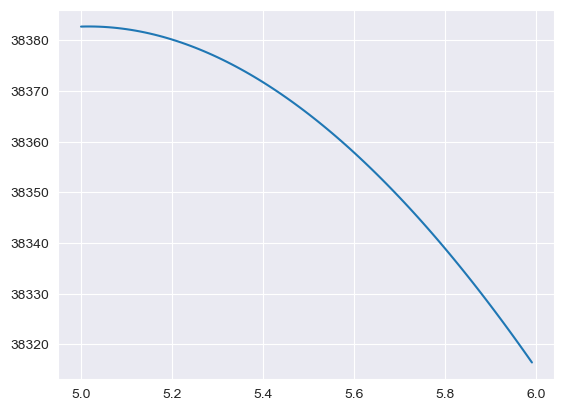

In [13]:
sns.lineplot(x=betas,y=mle_bets)

In [15]:
print(1/5 - 1/6)

0.033333333333333354
